In [6]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

In [7]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [8]:
# Load the model
model = load_model("keras_model.h5", compile=False)
# Load the labels
class_names = open("labels.txt", "r").readlines()

<IPython.core.display.Javascript object>

photo.jpg
Saved to photo.jpg


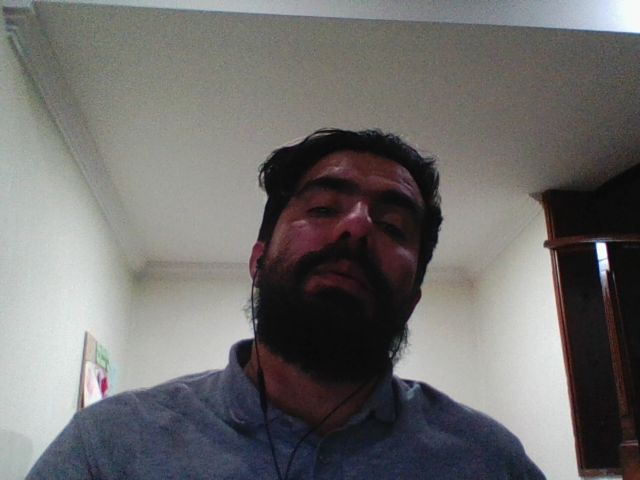

1/1 [==============================] - 1s 912ms/step
Class: Batman
Confidence Score: 0.996949


<IPython.core.display.Javascript object>

photo.jpg
Saved to photo.jpg


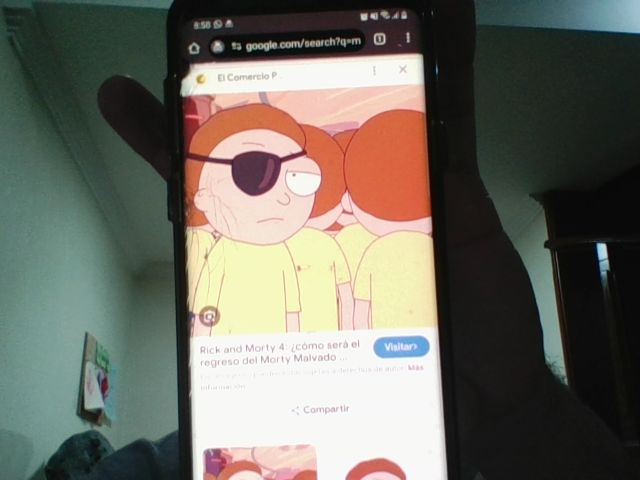

1/1 [==============================] - 0s 49ms/step
Class: Morty
Confidence Score: 0.83592194


<IPython.core.display.Javascript object>

photo.jpg
Saved to photo.jpg


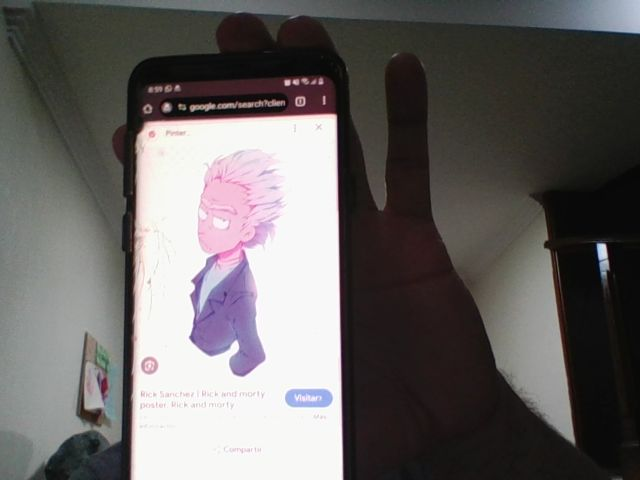

1/1 [==============================] - 0s 31ms/step
Class: Morty
Confidence Score: 0.8269201


<IPython.core.display.Javascript object>

photo.jpg
Saved to photo.jpg


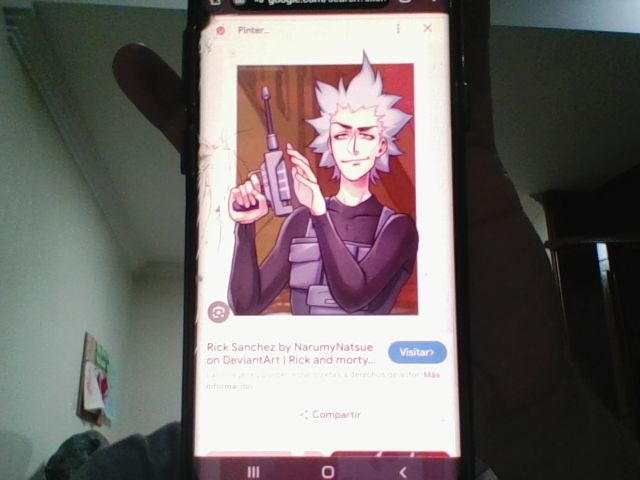

1/1 [==============================] - 0s 38ms/step
Class: Batman
Confidence Score: 0.9472931


<IPython.core.display.Javascript object>

photo.jpg
Saved to photo.jpg


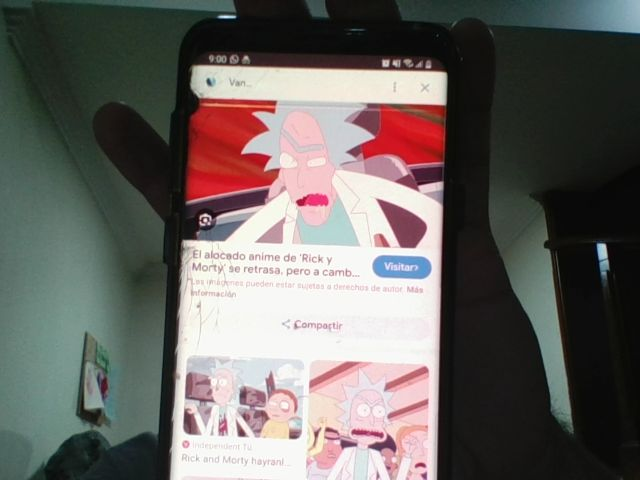

1/1 [==============================] - 0s 32ms/step
Class: Batman
Confidence Score: 0.6042111


<IPython.core.display.Javascript object>

photo.jpg
Saved to photo.jpg


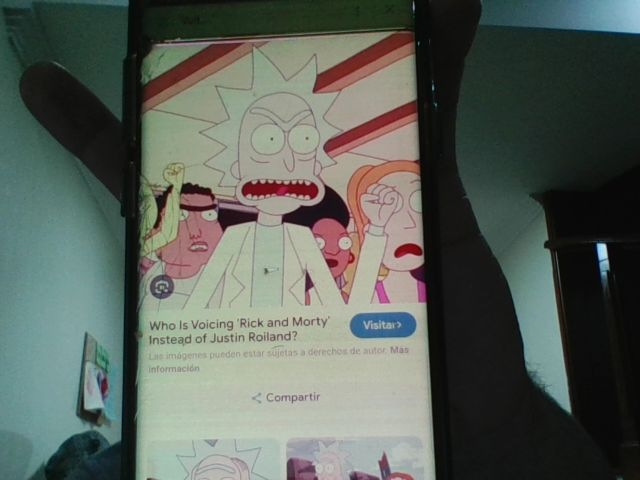

1/1 [==============================] - 0s 32ms/step
Class: Batman
Confidence Score: 0.7706759


<IPython.core.display.Javascript object>

photo.jpg
Saved to photo.jpg


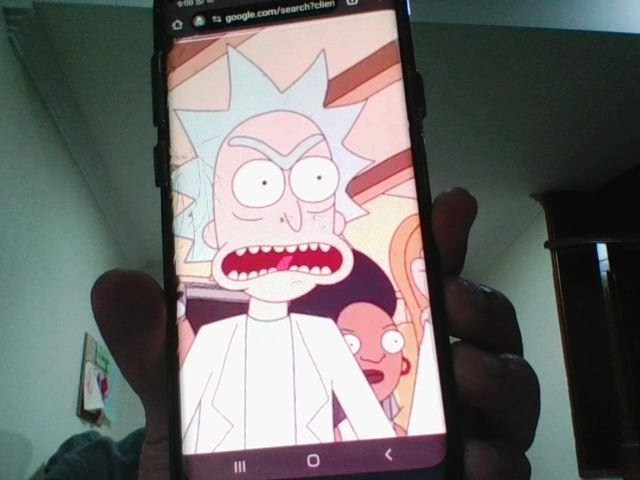

1/1 [==============================] - 0s 33ms/step
Class: Batman
Confidence Score: 0.8110776


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [9]:
from IPython.display import Image
import matplotlib.pyplot as plt
import cv2

for i in range(10):
  filename = take_photo()
  print(filename)
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

  # Replace this with the path to your image
  image = cv2.imread('/content/photo.jpg')#.convert("RGB")

  # resizing the image to be at least 224x224 and then cropping from the center
  size = (224, 224)
  image = cv2.resize(image, size)

  # turn the image into a numpy array
  image_array = np.asarray(image)

  # Normalize the image
  normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

  # Load the image into the array
  data[0] = normalized_image_array

  # Predicts the model
  prediction = model.predict(data)
  index = np.argmax(prediction)
  class_name = class_names[index]
  confidence_score = prediction[0][index]

  # Print prediction and confidence score
  print("Class:", class_name[2:], end="")
  print("Confidence Score:", confidence_score)